Q: What kinds of classification algorithms do you know?

A:  
1. Logistic regression
2. NN
3. SVM
4. KNN

Q: Please briefly describe each of them

A:
In general, the input to all classification algorithms consists of a feature table ${\textstyle X \in M^{m x n}[\mathbb{R}]}$  and a labels vector ${\textstyle y \in \mathbb{R}^m}$, where y has non-negative integer values which are can be thought of as the classes labels
1. Logistic regression (for binary classification): each sample is assumed a realization of the pair of random variables ${\textstyle(X_i, Y_i)}$, where $Y_i | X_i \sim Bernoully(p_i)$. Thus the probability mass function of $Y_i$ is  $P_{Y_i} = p_i^{Y_i}(1-p_i)^{1-Y_i}$ (since $P_{Y_i}(1) = p_i, and P_{Y_i}(0) = 1-p_i $. 
If we assume that the log-odds (logit) are linear in $X_i$, that is: $ln(\frac{p_i}{1-pi}) =  X_i \theta$, it follows that $p_i = h_{\theta}(X_i) = Sigmoid( X_i \theta) = \frac{1}{1-e^{- X_i \theta}}$. Our goal when training is to find the vector $\theta$ which gives the best approximation of $y$ given $X$ (over the train set).
"best" here is in the sense of maximizing the likelihood $\Pi_{i=1}^m   p_i^{y_i}(1-p_i)^{1-y_i}$, which is done by minimizing the log-likelihood:
$J_{\theta} = -\frac{1}{m}\sum_{i=1}^m ln(P_{Y_i|X_i}) = \frac{1}{m}\sum_{i=1}^m [ y_i ln(h_{\theta}(X_i) + (1-y_i)ln(1-h_{\theta}(X_i))]$. 
This is achieved by applying a standard numerical minimization procedure (e.g. gradient descent)

2. NN: The network consists of input layer, output layer and hidden layers. The input layer has dimension equal to $n+1$ (the 1 is the bias node). Each node's input is the output of a logistic regression with appropriate weights. TODO: improve this...

3. SVM: This method, as opposed to Logistin regression or NN doesn't predict a probability per instance, but a rigid binary result. The idea is to find a decision boundary which maximizes the margin between the classes. The support vectors are the lines defining the boundary of each class. 

4. KNN - each new point to be predicted is associated a class based on the majority vote of its K nearest neighbours.  
 

Q: What are the pros and cons of each scheme? When will you use which of them?

A:
    - Logistic regression v.s. SVM: https://towardsdatascience.com/your-beginner-guide-to-basic-classification-models-logistic-regression-and-svm-b7eef864ec9a#:~:text=Logistic%20Regression%20vs%20Support%20Vector%20Machine&text=It%20determines%20weights%20of%20importance,probability%20functions%20for%20each%20prediction.&text=For%20SVM%2C%20on%20the%20other,closest%20to%20the%20decision%20boundary
    - From Stanford's course: 
Logistic Regression vs. SVMs
If n is large (relative to m), then use logistic regression, or SVM without a kernel (the "linear kernel")

If n is small and m is intermediate, then use SVM with a Gaussian Kernel

If n is small and m is large, then manually create/add more features, then use logistic regression or SVM without a kernel.

In the first case, we don't have enough examples to need a complicated polynomial hypothesis. In the second example, we have enough examples that we may need a complex non-linear hypothesis. In the last case, we want to increase our features so that logistic regression becomes applicable.

Note: a neural network is likely to work well for any of these situations, but may be slower to train.
    

Q: Apply all methods you've mentioned on the following dataset and compare 

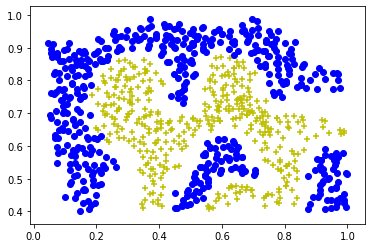

In [2]:
from numpy import genfromtxt
import matplotlib.pyplot as plt
X = genfromtxt('Data/X2.csv', delimiter=',')
y = genfromtxt('Data/y2.csv', delimiter=',')
X2_0 = X[y==0]
X2_1 = X[y==1]
plt.scatter(X2_0[:,0], X2_0[:,1], c='y', marker='+')
plt.scatter(X2_1[:,0], X2_1[:,1], c='b')

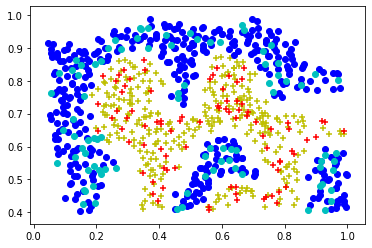

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X2_0 = X_train[y_train==0]
X2_1 = X_train[y_train==1]
X2_0_test = X_test[y_test==0]
X2_1_test = X_test[y_test==1]

plt.scatter(X2_0[:,0], X2_0[:,1], c='y', marker='+')
plt.scatter(X2_1[:,0], X2_1[:,1], c='b')
plt.scatter(X2_0_test[:,0], X2_0_test[:,1], c='r', marker='+')
plt.scatter(X2_1_test[:,0], X2_1_test[:,1], c='c')


[[68  8]
 [19 78]]
              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85        86
         1.0       0.89      0.78      0.83        87

    accuracy                           0.84       173
   macro avg       0.85      0.84      0.84       173
weighted avg       0.85      0.84      0.84       173



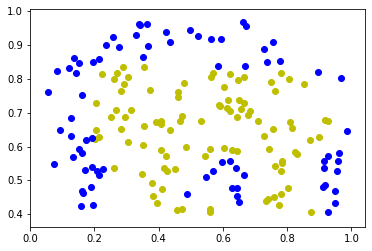

In [7]:
#################### Logistic regression ####################
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix

# 1. Logistic regression
X_logit_raw = np.concatenate((X_train, X_train**2, X_train**3, X_train**4), axis=1)
scaler = preprocessing.StandardScaler().fit(X_logit_raw)
X_logit = scaler.transform(X_logit_raw)
X_logit_test = scaler.transform(np.concatenate((X_test, X_test**2, X_test**3, X_test**4), axis=1))
clf = LogisticRegressionCV(cv=5, random_state=4, max_iter = 1000).fit(X_logit, y_train)
y_hat = clf.predict(X_logit_test)
X_test_predicted_0 = X_test[y_hat==0]
X_test_predicted_1 = X_test[y_hat==1]
plt.scatter(X_test_predicted_0[:,0], X_test_predicted_0[:,1], c='y')
plt.scatter(X_test_predicted_1[:,0], X_test_predicted_1[:,1], c='b')

cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
print(cnf_matrix.T)
print(classification_report(y_test, y_hat))



# Tuning hyper-parameters for precision



C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

Best parameters set found on development set:

{'C': 30, 'gamma': 30, 'kernel': 'rbf'}

Grid scores on development set:

0.285 (+/-0.004) for {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
0.285 (+/-0.004) for {'C': 0.01, 'gamma': 0.03, 'kernel': 'rbf'}
0.285 (+/-0.004) for {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
0.285 (+/-0.004) for {'C': 0.01, 'gamma': 0.3, 'kernel': 'rbf'}
0.285 (+/-0.004) for {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}
0.285 (+/-0.004) for {'C': 0.01, 'gamma': 3, 'kernel': 'rbf'}
0.285 (+/-0.004) for {'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}
0.285 (+/-0.004) for {'C': 0.01, 'gamma': 30, 'kernel': 'rbf'}
0.285 (+/-0.004) for {'C': 0.03, 'gamma': 0.01, 'kernel': 'rbf'}
0.285 (+/-0.004) for {'C': 0.03, 'gamma': 0.03, 'kernel': 'rbf'}
0.285 (+/-0.004) for {'C': 0.03, 'gamma': 0.1, 'kernel': 'rbf'}
0.285 (+/-0.004) for {'C': 0.03, 'gamma': 0.3, 'kernel': 'rbf'}
0.285 (+/-0.004) for {'C': 0.03, 'gamma': 1, 'kernel': 'rbf'}
0.285 (+/-0.004) for {'C': 0.03, 'gamma': 3, 'kerne

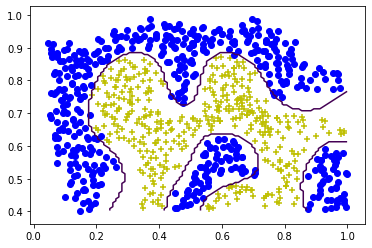

In [8]:
#################### SVM ####################
from sklearn.svm import SVC
from IPython.core.debugger import set_trace
# SVM with gaussian kernel


from sklearn.model_selection import GridSearchCV
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30],
                     'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]},
                    {'kernel': ['linear'], 'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]}]

# tuned_parameters = [{'kernel': ['rbf'], 'gamma': [30],
#                      'C': [30]},
#                     ]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
       SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

    


def plot_data(X, y, ax):
    X_0 = X[y==0]
    X_1 = X[y==1]
    ax.scatter(X_0[:,0], X_0[:,1], c='y', marker='+')
    ax.scatter(X_1[:,0], X_1[:,1], c='b')

def visualize_boundary(X, y, model):
    # %VISUALIZEBOUNDARY plots a non-linear decision boundary learned by the SVM
    # %   VISUALIZEBOUNDARYLINEAR(X, y, model) plots a non-linear decision 
    # %   boundary learned by the SVM and overlays the data on it
    fig, ax = plt.subplots()
    #  Plot the training data on top of the boundary
    plot_data(X, y, ax)

#     % Make classification predictions over a grid of values
    x1plot = np.linspace(min(X[:,0]), max(X[:,0]), 100).T;
    x2plot = np.linspace(min(X[:,1]), max(X[:,1]), 100).T;
    [X1, X2] = np.meshgrid(x1plot, x2plot);
    vals = np.zeros(X1.shape);
    for i in np.arange(0, X1.shape[1]):
#         set_trace()
        this_X = np.column_stack((X1[:, i], X2[:, i]));
        vals[:, i] = model.predict(this_X);
    

    # Plot the SVM boundary
#     set_trace()
    ax.contour(X1, X2, vals, levels=[0.5]);
   

visualize_boundary(X, y, clf)

# Tuning hyper-parameters for precision



C:\Users\Matan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimiz

C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Ma

C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

Best parameters set found on development set:

{'alpha': 0.03, 'hidden_layer_sizes': (200, 300, 150, 45)}

Grid scores on development set:

0.539 (+/-0.395) for {'alpha': 0.01, 'hidden_layer_sizes': 10}
0.459 (+/-0.429) for {'alpha': 0.01, 'hidden_layer_sizes': (5, 2)}
0.673 (+/-0.420) for {'alpha': 0.01, 'hidden_layer_sizes': (20, 3)}
0.909 (+/-0.127) for {'alpha': 0.01, 'hidden_layer_sizes': (200, 300, 150, 45)}
0.479 (+/-0.370) for {'alpha': 0.03, 'hidden_layer_sizes': 10}
0.464 (+/-0.323) for {'alpha': 0.03, 'hidden_layer_sizes': (5, 2)}
0.700 (+/-0.479) for {'alpha': 0.03, 'hidden_layer_sizes': (20, 3)}
0.956 (+/-0.051) for {'alpha': 0.03, 'hidden_layer_sizes': (200, 300, 150, 45)}
0.501 (+/-0.390) for {'alpha': 0.1, 'hidden_layer_sizes': 10}
0.441 (+/-0.417) for {'alpha': 0.1, 'hidden_layer_sizes': (5, 2)}
0.582 (+/-0.546) for {'alpha': 0.1, 'hidden_layer_sizes': (20, 3)}
0.920 (+/-0.138) for {'alpha': 0.1, 'hidden_layer_sizes': (200, 300, 150, 45)}
0.508 (+/-0.325) for {'alpha':

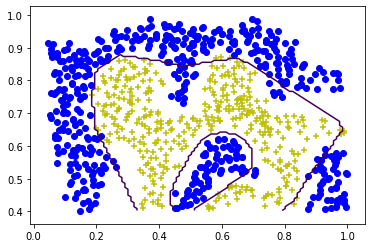

In [111]:
#################### NN ####################

from sklearn.neural_network import MLPClassifier
# clf = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter = 1000,
#                     hidden_layer_sizes=(5, 2), random_state=1).fit(X_train, y_train)

tuned_parameters = [{'hidden_layer_sizes': [(10), (5,2), (20,3), (200, 300, 150, 45) ], 'alpha': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30],
                     },
                    ]

# tuned_parameters = [{'hidden_layer_sizes': [(120,30,150, 45) ], 'alpha': [0.01],
#                      },
#                     ]

# scores = ['precision', 'recall']
scores = ['precision']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
       MLPClassifier( max_iter = 1000), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

visualize_boundary(X, y, clf)

# Tuning hyper-parameters for precision



C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Matan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

Best parameters set found on development set:

{'learning_rate': 0.3, 'n_estimators': 100}

Grid scores on development set:

0.741 (+/-0.037) for {'learning_rate': 0.01, 'n_estimators': 1}
0.769 (+/-0.090) for {'learning_rate': 0.01, 'n_estimators': 10}
0.815 (+/-0.087) for {'learning_rate': 0.01, 'n_estimators': 50}
0.828 (+/-0.082) for {'learning_rate': 0.01, 'n_estimators': 100}
0.831 (+/-0.094) for {'learning_rate': 0.01, 'n_estimators': 200}
0.741 (+/-0.037) for {'learning_rate': 0.03, 'n_estimators': 1}
0.800 (+/-0.046) for {'learning_rate': 0.03, 'n_estimators': 10}
0.831 (+/-0.082) for {'learning_rate': 0.03, 'n_estimators': 50}
0.835 (+/-0.092) for {'learning_rate': 0.03, 'n_estimators': 100}
0.834 (+/-0.083) for {'learning_rate': 0.03, 'n_estimators': 200}
0.741 (+/-0.037) for {'learning_rate': 0.1, 'n_estimators': 1}
0.824 (+/-0.068) for {'learning_rate': 0.1, 'n_estimators': 10}
0.829 (+/-0.084) for {'learning_rate': 0.1, 'n_estimators': 50}
0.858 (+/-0.082) for {'learning_

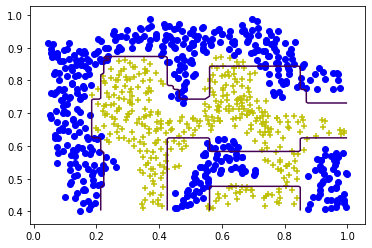

In [9]:
######################## ADA boost #############################
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

tuned_parameters = [{'n_estimators': [1, 10, 50, 100, 200 ], 'learning_rate': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30],
                     },
                    ]

scores = ['precision', 'recall']
# scores = ['precision']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
       AdaBoostClassifier(random_state=0), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

visualize_boundary(X, y, clf)


 



In [88]:
[X1, X2] = np.meshgrid(np.linspace(1,3,3), np.linspace(1,3,3));
print(X1[:,1])
np.column_stack((X1[:,1], X2[:,1]))

[2. 2. 2.]


array([[2., 1.],
       [2., 2.],
       [2., 3.]])

Q: When will you use gradient descent and when a matrix solution in linear regression

In [104]:
scoring='%s_macro' % score

In [105]:
scoring

'recall_macro'